### <span style = 'color:blue'> Sales Data Analysis<span/>

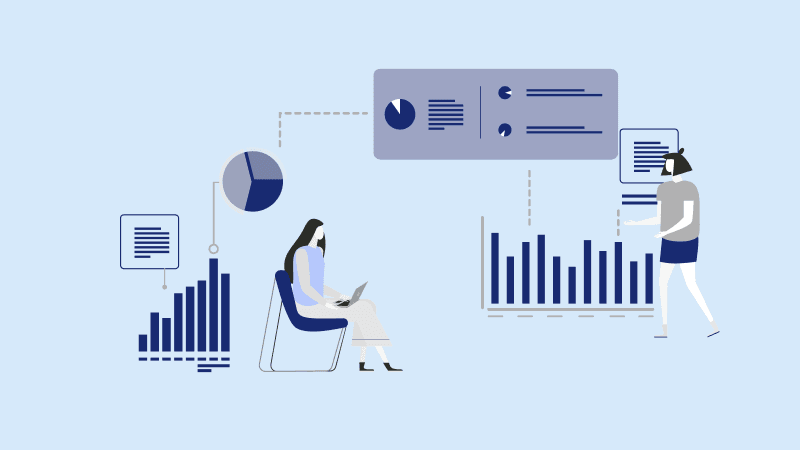

About the project :
In the this project we will identify trends, top-selling products, and revenue metrics for business decision-making, but befor this steps i will propose a question and answer it along with some plots and analysis.\
1-How much and how many products did we sell in each month?\
2-How much did each product sell each month?


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 
from collections import Counter
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.graph_objs as go
import seaborn as sns
import folium


In [2]:
df = pd.read_csv("C:\\Users\\imad0\\Downloads\\Dataset MeriSKILL\\Sales Data.csv")
df.shape

(185950, 11)

In [3]:
df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


<b>Data Exploration:</b>

Explore the dataset to understand its structure and content.

In [4]:
# Display the first few rows of the dataset
print(df.head())


   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

In [5]:
# Get summary statistics of numeric columns
print(df.describe())



          Unnamed: 0       Order ID  Quantity Ordered     Price Each  \
count  185950.000000  185950.000000     185950.000000  185950.000000   
mean     8340.388475  230417.569379          1.124383     184.399735   
std      5450.554093   51512.737110          0.442793     332.731330   
min         0.000000  141234.000000          1.000000       2.990000   
25%      3894.000000  185831.250000          1.000000      11.950000   
50%      7786.000000  230367.500000          1.000000      14.950000   
75%     11872.000000  275035.750000          1.000000     150.000000   
max     25116.000000  319670.000000          9.000000    1700.000000   

               Month          Sales           Hour  
count  185950.000000  185950.000000  185950.000000  
mean        7.059140     185.490917      14.413305  
std         3.502996     332.919771       5.423416  
min         1.000000       2.990000       0.000000  
25%         4.000000      11.950000      11.000000  
50%         7.000000      14.9500

In [6]:

# Check for missing values
print(df.isnull().sum())

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [7]:
df.tail()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,13621,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [8]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [9]:
df[['Order ID', 'Product', 'Order Date', 'Purchase Address']].describe()

,Order ID
count,185950.000000
mean,230417.569379
std,51512.737110
min,141234.000000
25%,185831.250000
50%,230367.500000
75%,275035.750000
max,319670.000000


In [10]:
df[df["Order ID"].isna()]


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour


In [11]:
# Sale Related
df['Sale'] = df['Quantity Ordered']*df['Price Each']

In [12]:
# Address Related
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df['State'] = df['Purchase Address'].apply(lambda x: x.split()[-2])
df['Postal Code'] = df['Purchase Address'].apply(lambda x: x.split()[-1])

In [13]:
# Time Related
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour

In [14]:
df.head(10)


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Sale,State,Postal Code,Year
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1700.00,NY,10001,2019
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,600.00,NY,10001,2019
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,11.95,NY,10001,2019
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,149.99,CA,94016,2019
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,11.95,GA,30301,2019
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22,3.84,NY,10001,2019
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15,11.95,OR,97035,2019
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9,23.90,TX,75001,2019
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23,99.99,TX,75001,2019
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,11,11.96,TX,75001,2019


In [15]:
print(df['Year'].value_counts())


Year
2019    185916
2020        34
Name: count, dtype: int64


In [16]:
df = df.drop(df[df['Year']==2020].index)

In [17]:
df.shape


(185916, 15)

In [18]:
desired = df.select_dtypes(include=[int, float, object])
dfsum_city = desired.groupby(['City']).sum()
dfsum_city.reset_index(inplace=True)

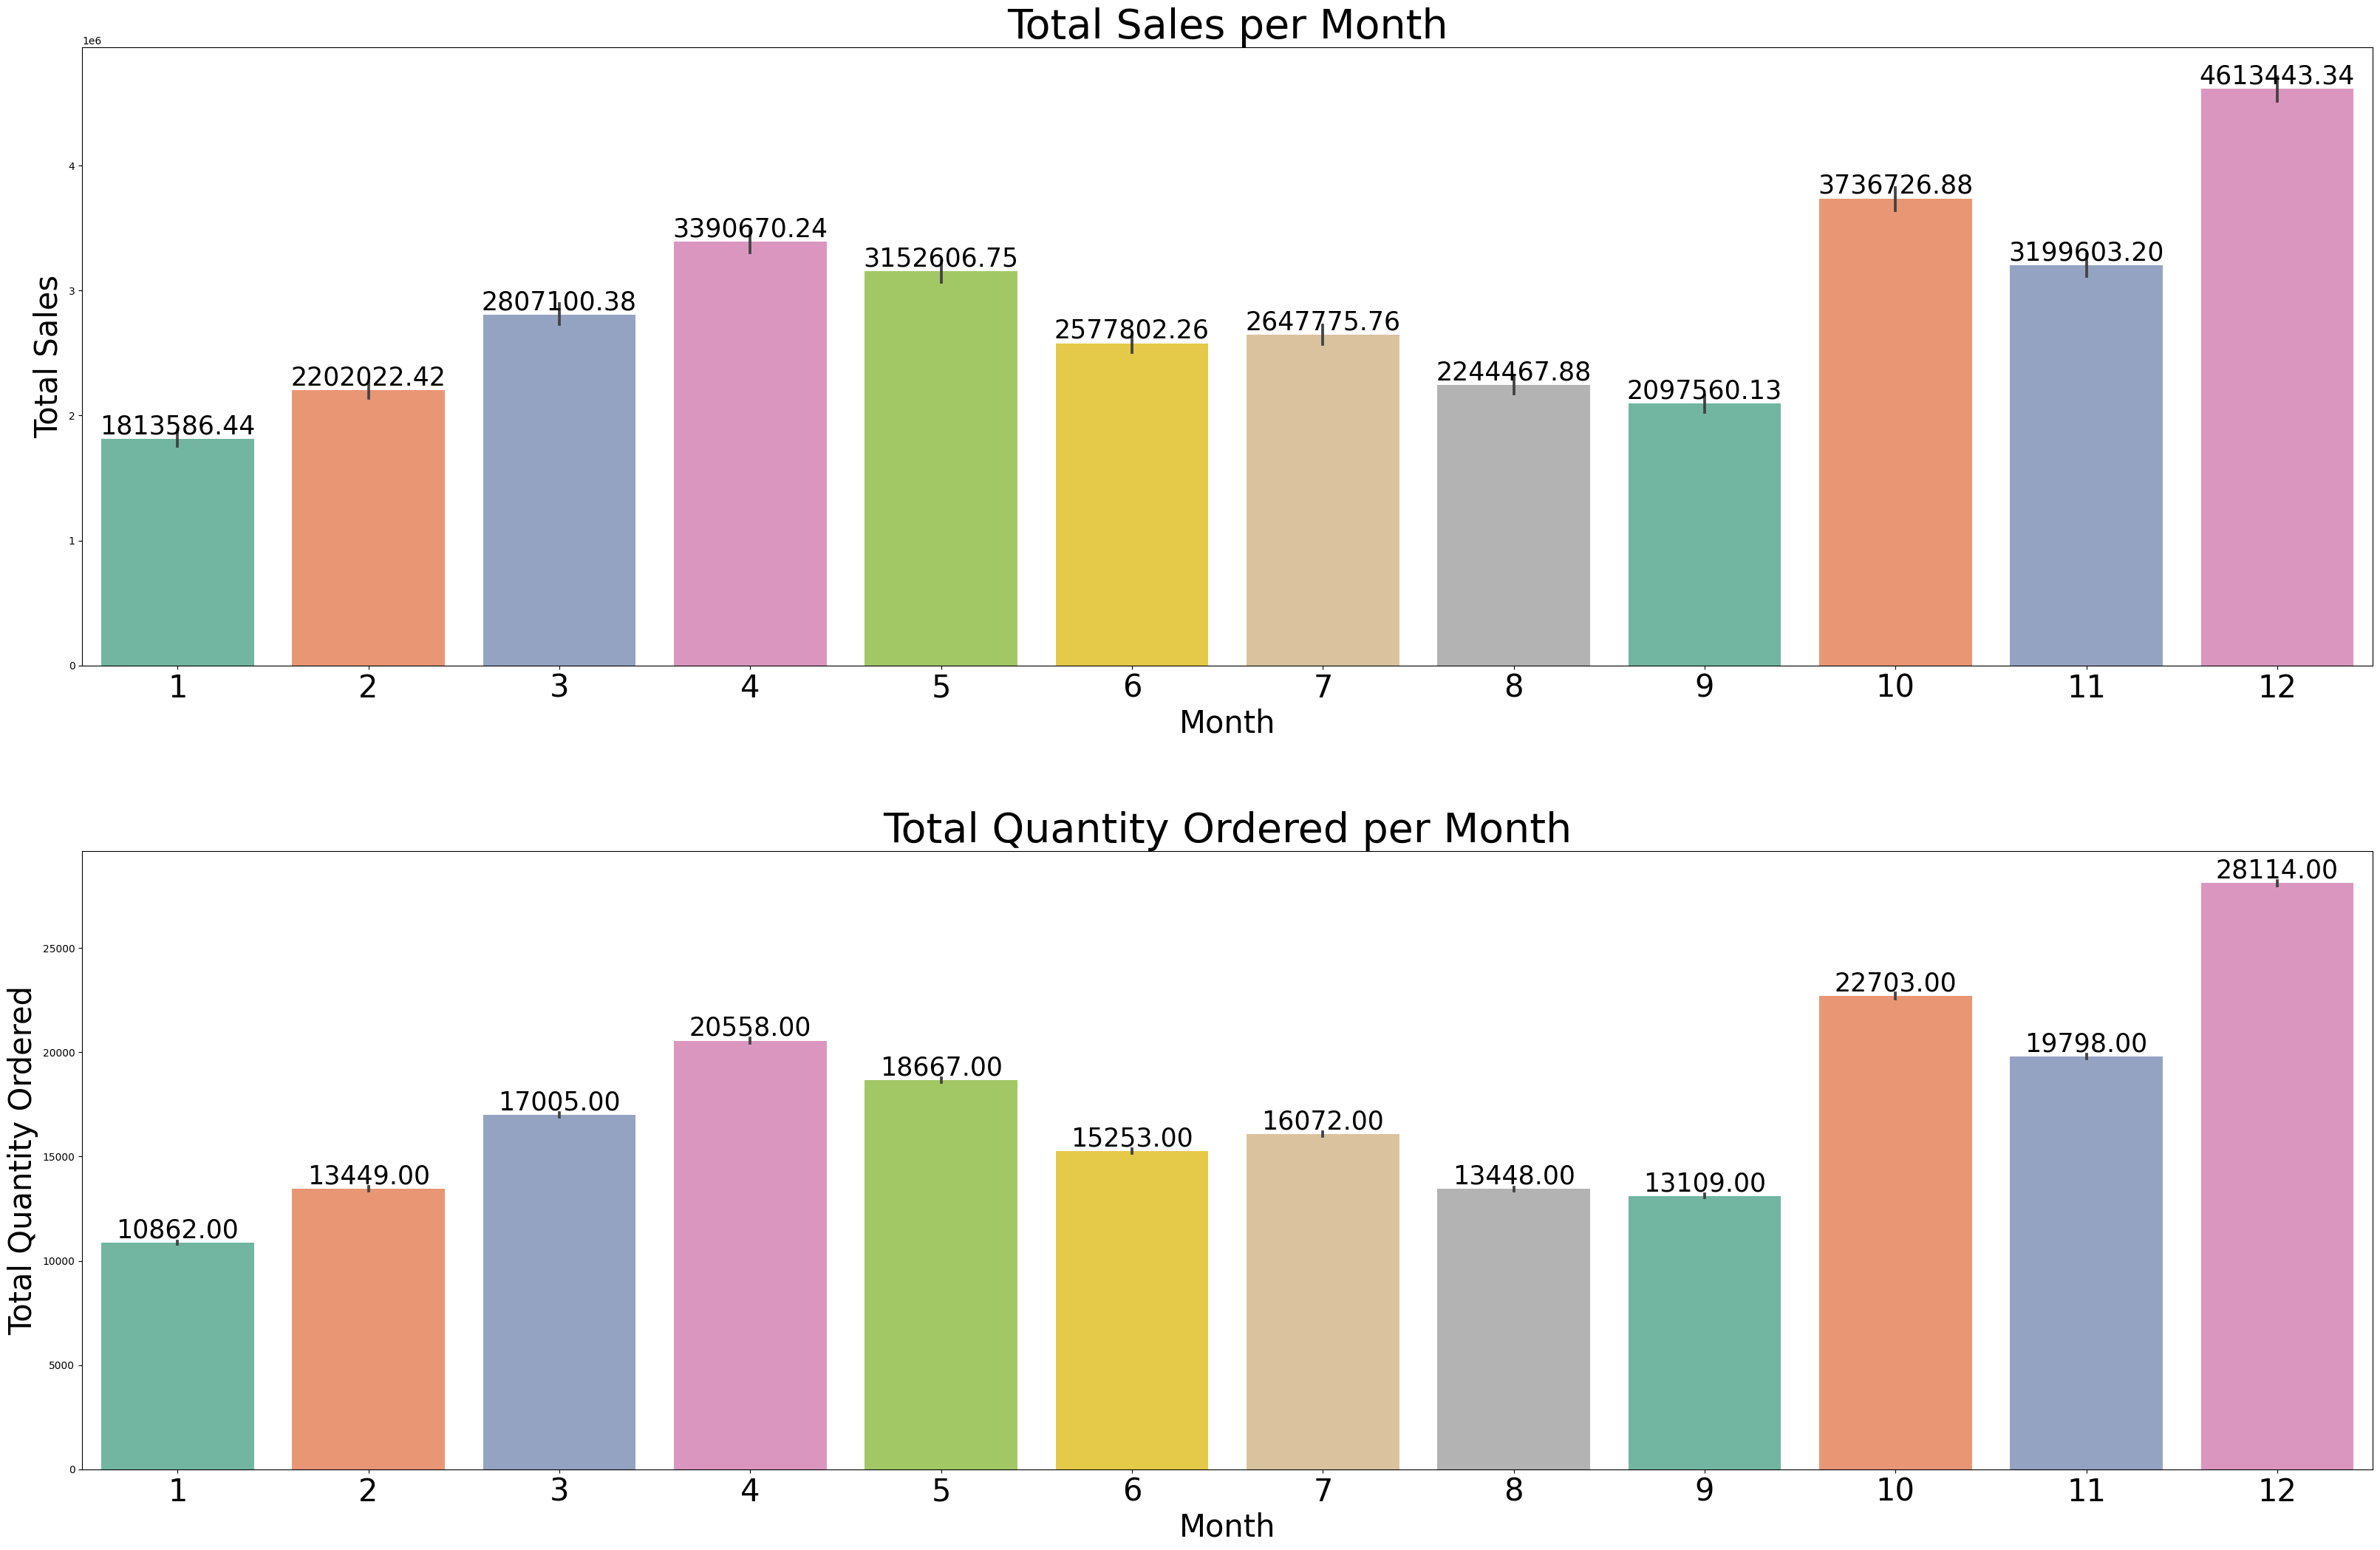

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'Month', 'Sale', and 'Quantity Ordered'

# Create a custom color palette
custom_palette = sns.color_palette("Set2")  # You can choose any color palette you like

# Create a subplot with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(40, 25))
fig.subplots_adjust(hspace=0.3)

# Plot the Total Sales per Month with custom colors
sns.barplot(x='Month', y='Sale', data=df, ax=axes[0], estimator=sum, palette=custom_palette)  # Use 'estimator' to specify sum
axes[0].set_xlabel('Month', size=30)
axes[0].set_ylabel('Total Sales', size=30)
axes[0].set_xticklabels(axes[0].get_xticklabels(), size=30)
axes[0].set_title('Total Sales per Month', size=40)
axes[0].bar_label(axes[0].containers[0], fmt='%.2f', size=25)

# Plot the Total Quantity Ordered per Month with custom colors
sns.barplot(x='Month', y='Quantity Ordered', data=df, ax=axes[1], estimator=sum, palette=custom_palette)  # Use 'estimator' to specify sum
axes[1].set_xlabel('Month', size=30)
axes[1].set_ylabel('Total Quantity Ordered', size=30)
axes[1].set_xticklabels(axes[1].get_xticklabels(), size=30)
axes[1].set_title('Total Quantity Ordered per Month', size=40)
axes[1].bar_label(axes[1].containers[0], fmt='%.2f', size=25)

plt.show()


<b>2-How much did each product sell each month?</b>\
By using FacetGrid here, we can have different subplots with the same scale in the axes. Each subplot here refers to a specific month that is listed as a title above the subplot. Y-axis shows the products, and X-axis displays "how much" or "how many" of that product we have sold in that specific month. Since all axes have the same scale, now, it is easier to compare the Total Sale and Quantity ordered of different products over months.

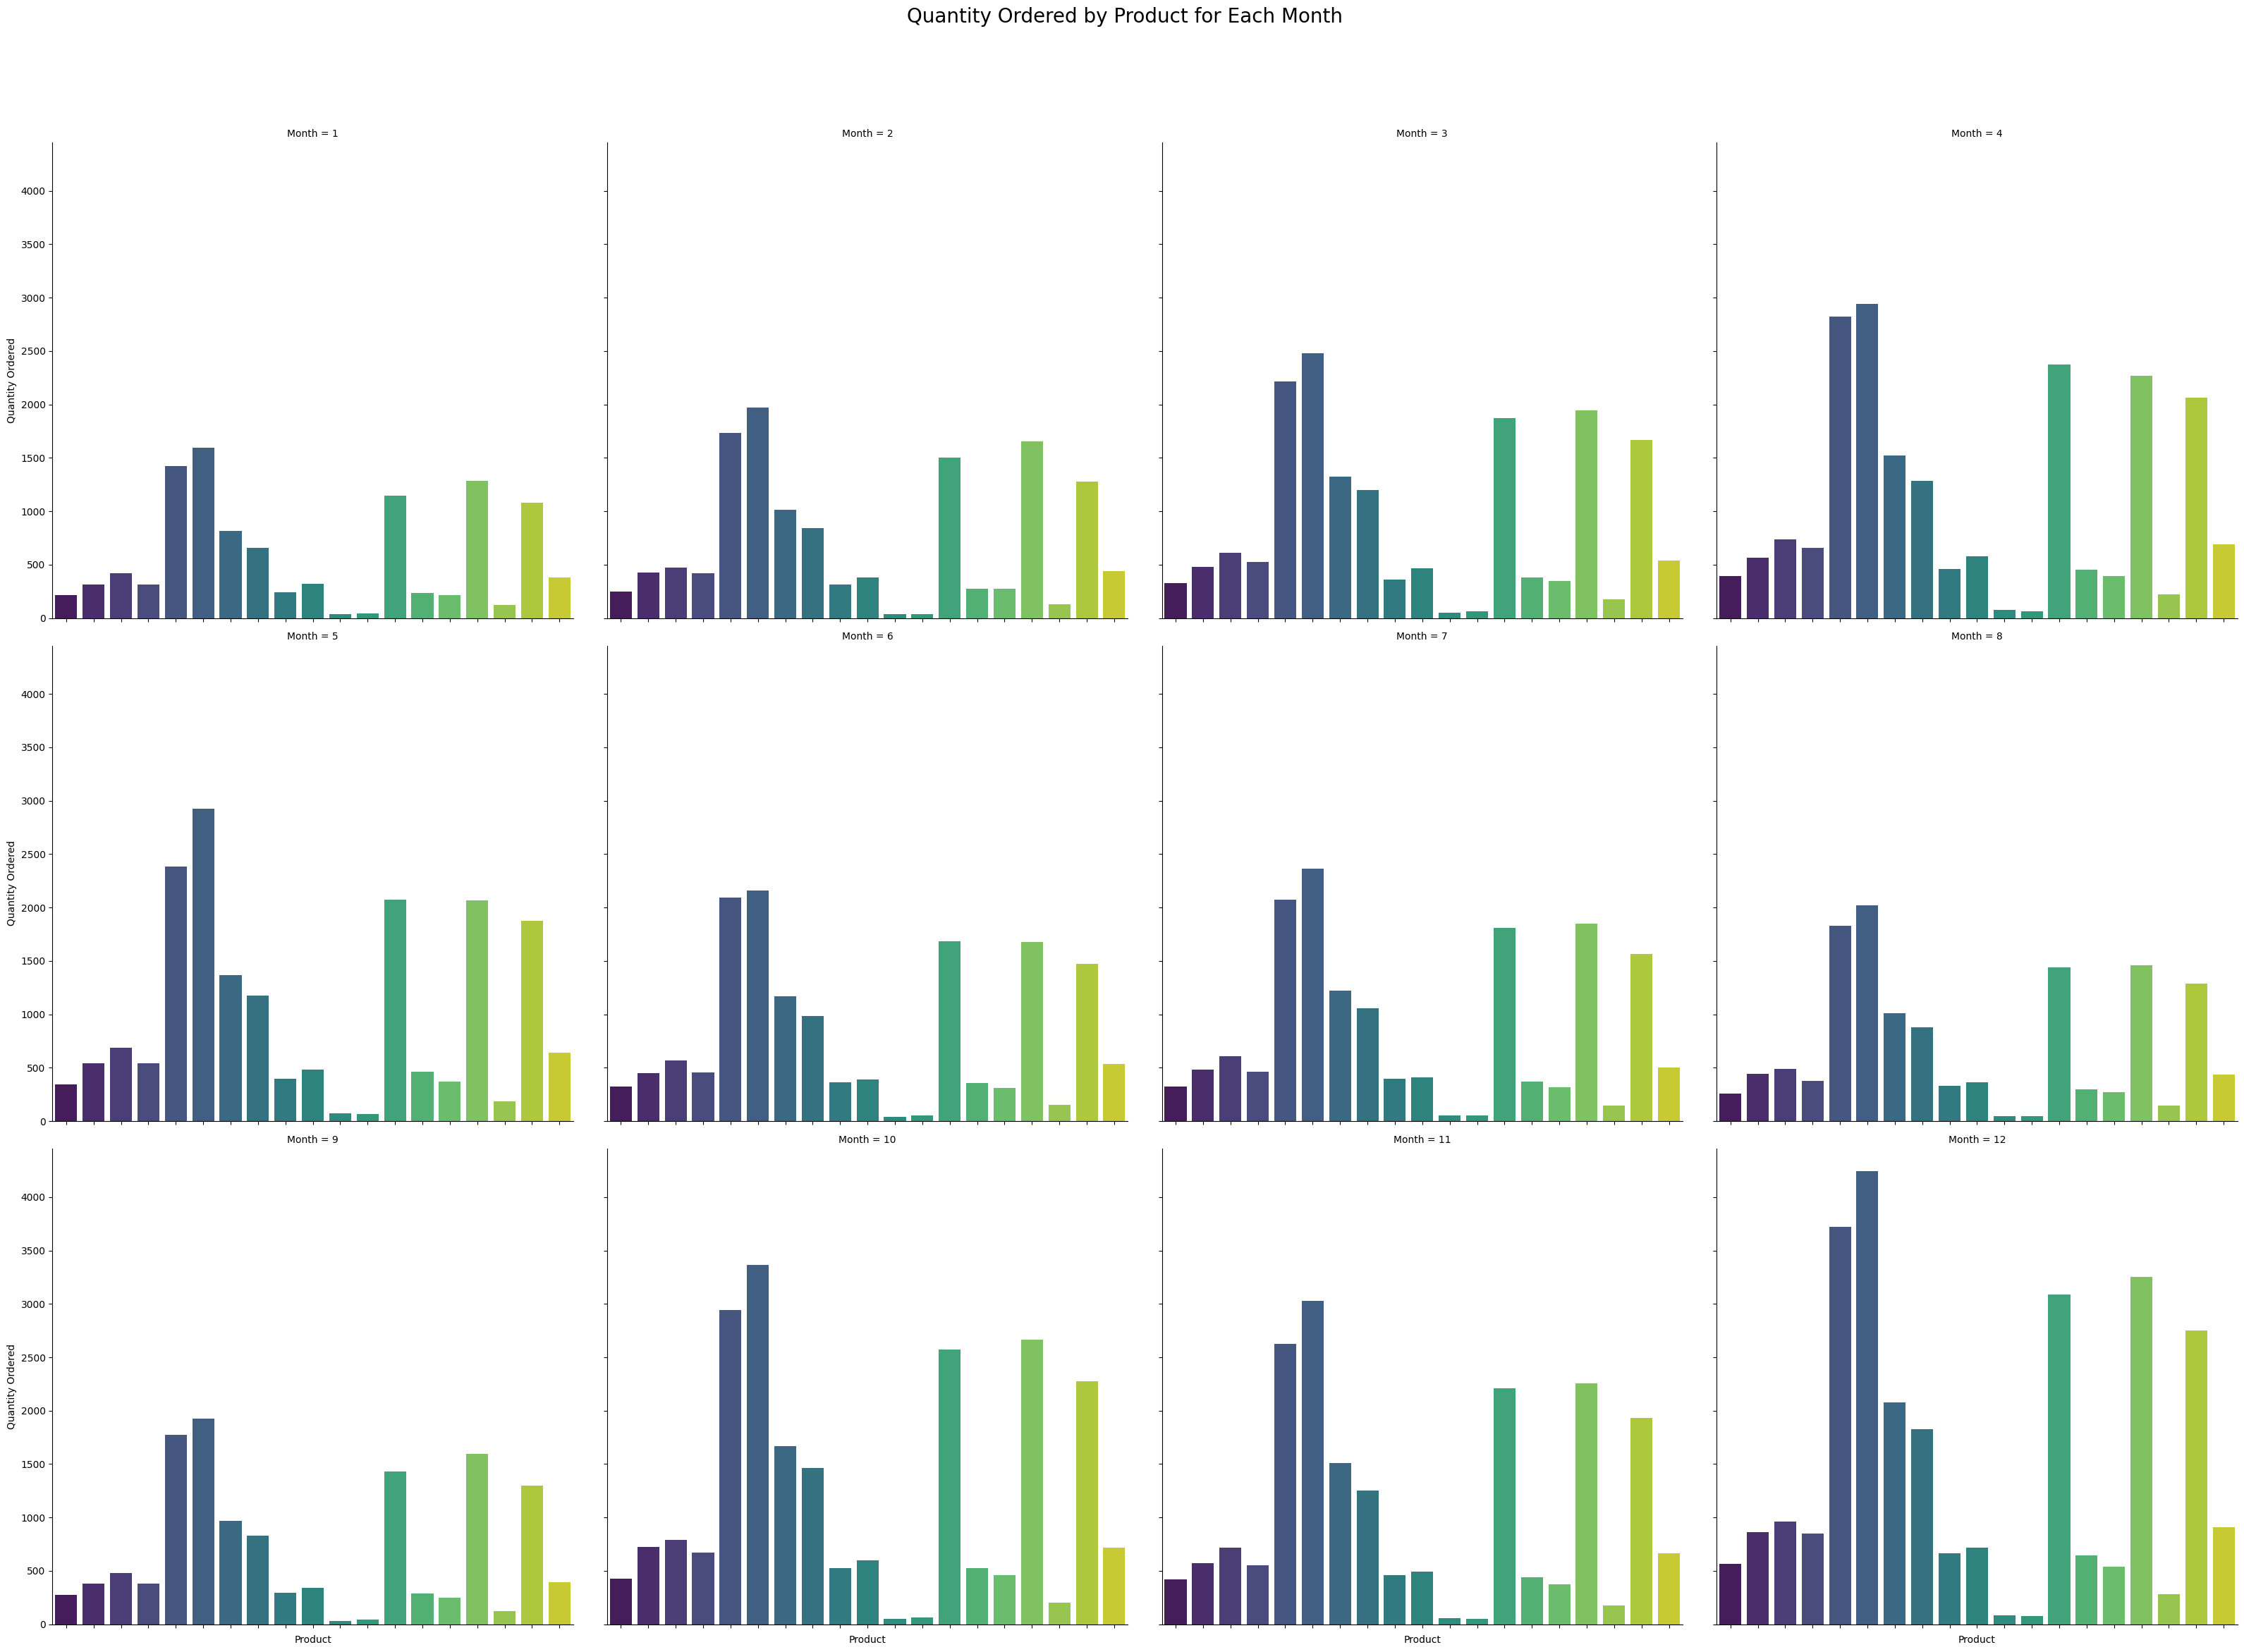

In [20]:

# Assuming we have a DataFrame 'df' with columns 'Month', 'Product', and 'Quantity Ordered'

# Group the data by 'Month' and 'Product' and calculate the sum of 'Quantity Ordered'
temp_data = df.groupby(['Month', 'Product'])['Quantity Ordered'].sum().reset_index()

# Create a FacetGrid with multiple barplots
g = sns.FacetGrid(temp_data, col="Month", col_wrap=4, height=8)
g.map_dataframe(sns.barplot, x="Product", y="Quantity Ordered", palette="viridis")

# Adjust the appearance of the FacetGrid
g.set_axis_labels("Product", "Quantity Ordered")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Quantity Ordered by Product for Each Month', fontsize=20)

# Rotate x-axis labels for better visibility
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


<b>How many did each product sell each month?<b/>

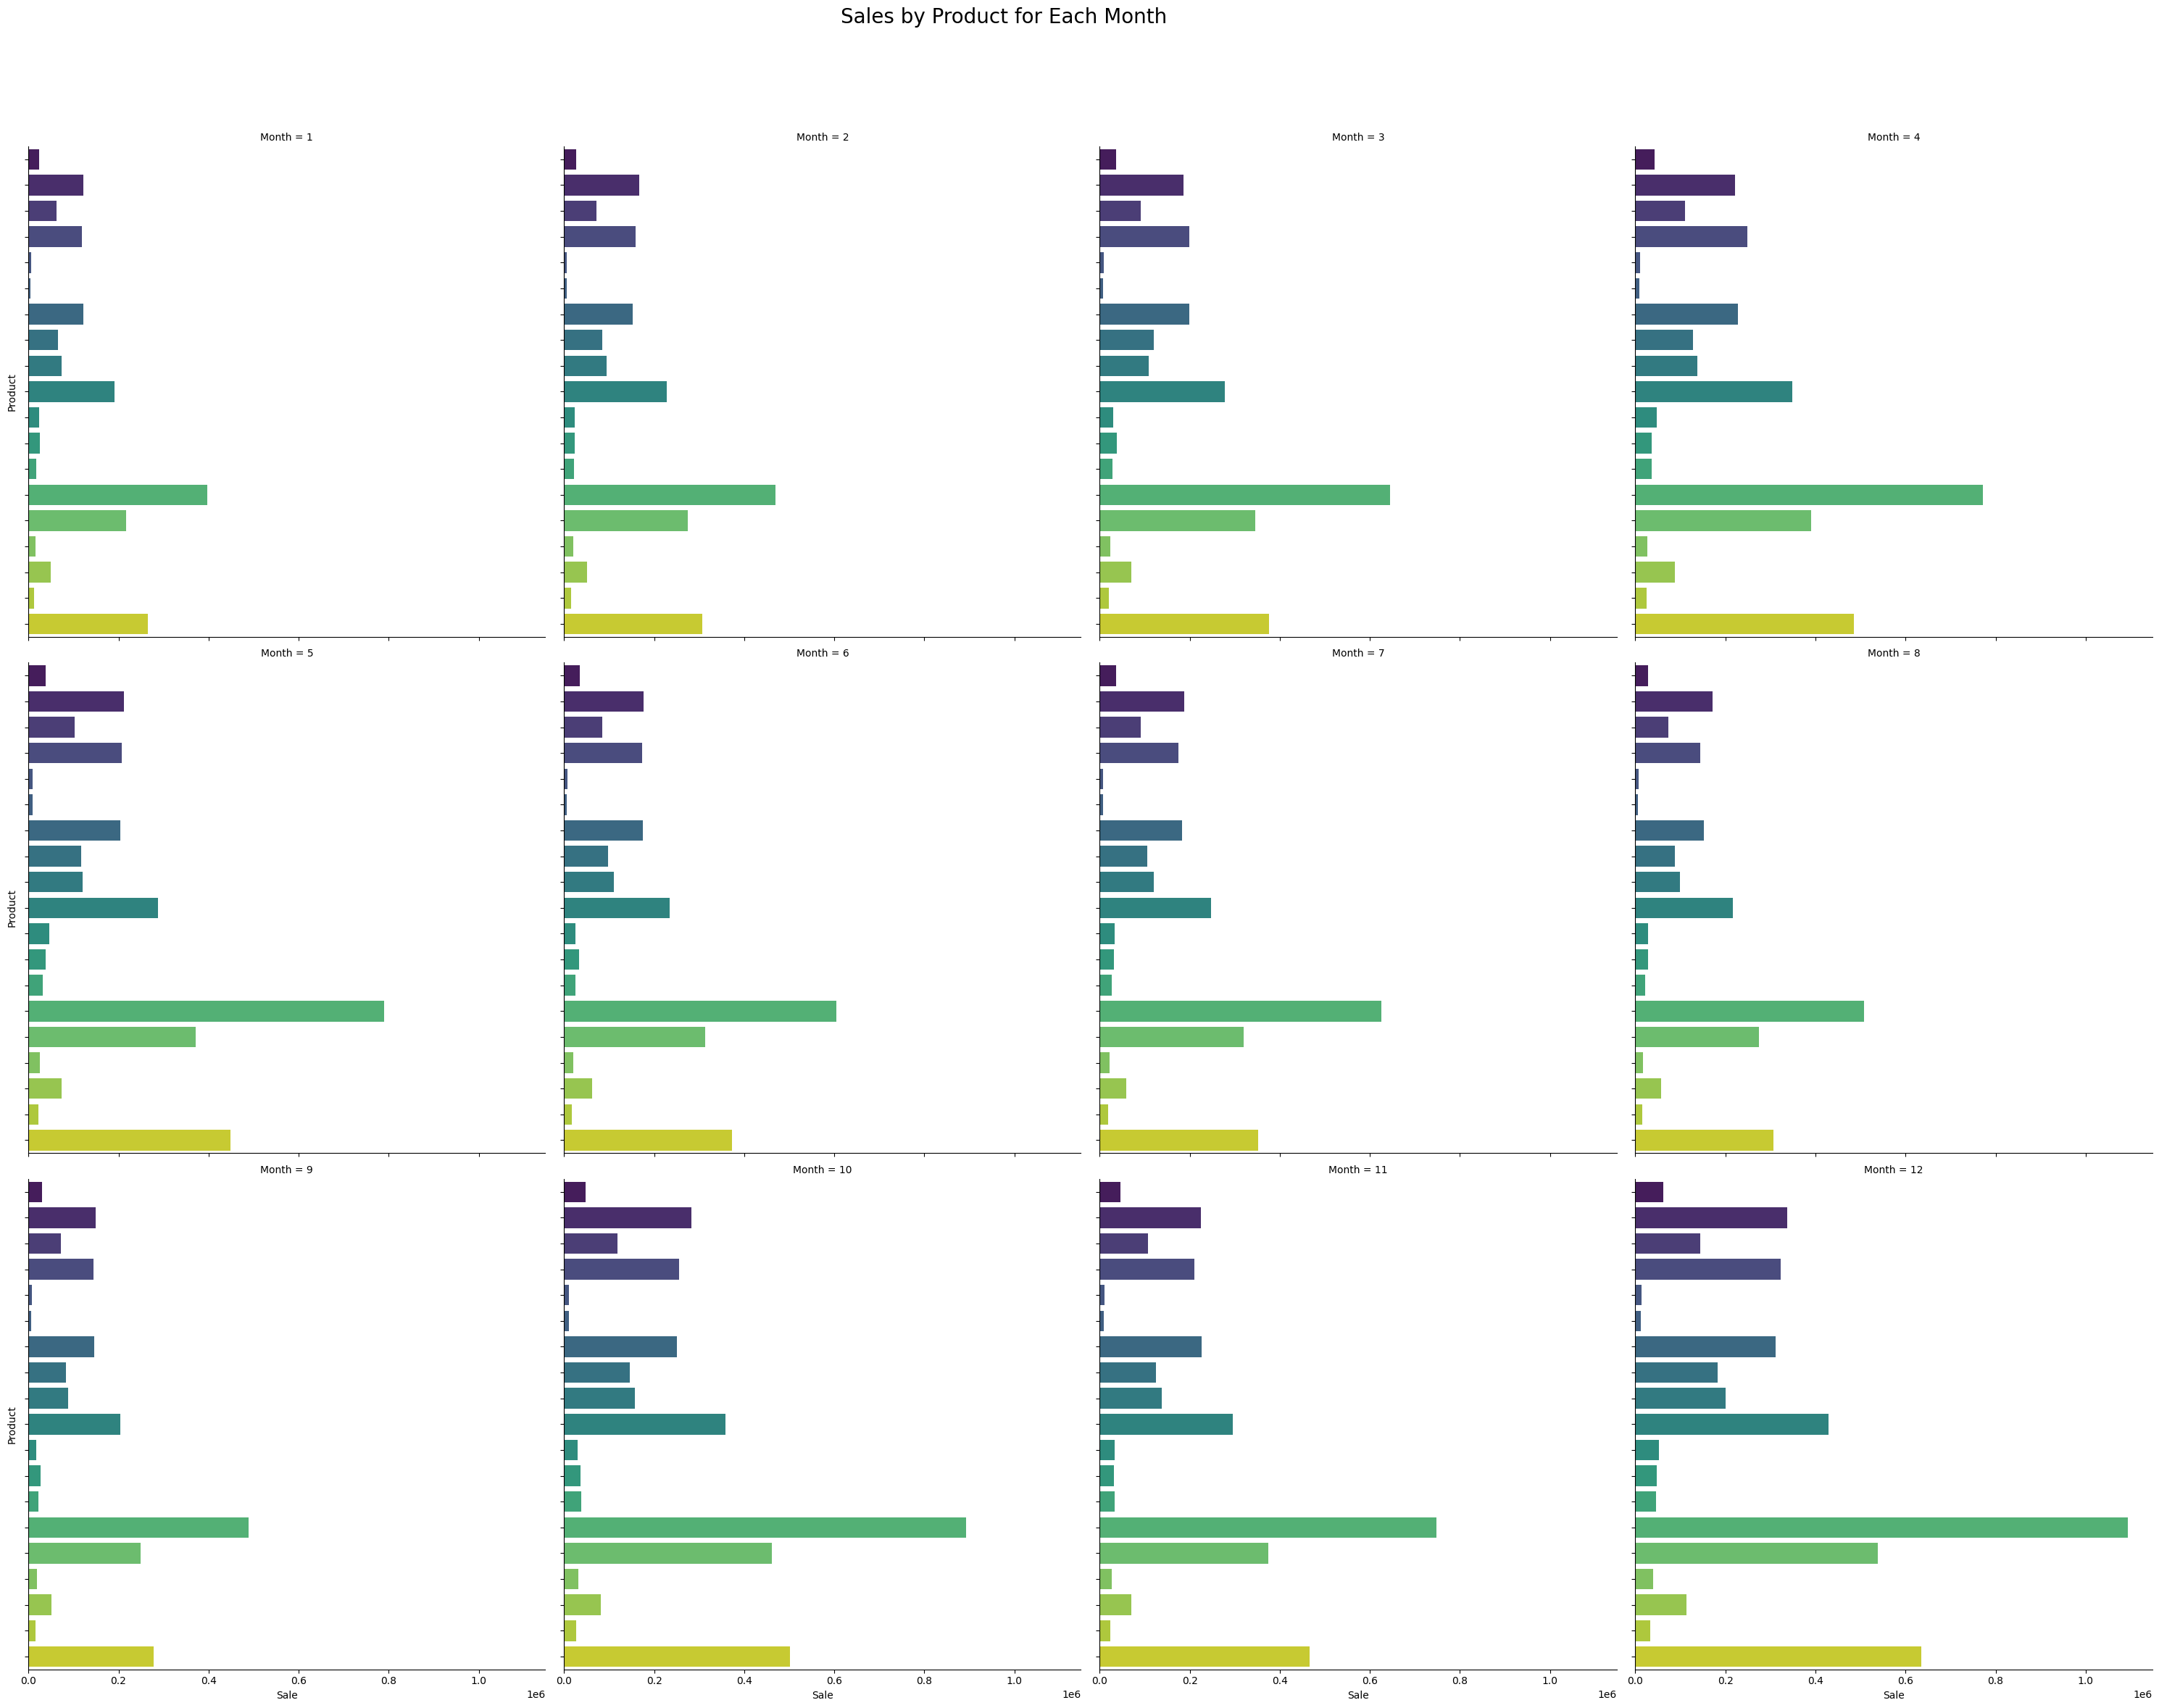

In [21]:

# Assuming you have a DataFrame 'df' with columns 'Month', 'Product', and 'Sale'

# Group the data by 'Month' and 'Product' and calculate the sum of 'Sale'
temp_data = df.groupby(['Month', 'Product'])['Sale'].sum().reset_index()

# Create a FacetGrid with multiple barplots
g = sns.FacetGrid(temp_data, col="Month", col_wrap=4, height=8)
g.map_dataframe(sns.barplot, x="Sale", y="Product", palette="viridis")

# Adjust the appearance of the FacetGrid
g.set_axis_labels("Sale", "Product")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Sales by Product for Each Month', fontsize=20)

# Rotate y-axis labels for better visibility
for ax in g.axes.flat:
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.show()


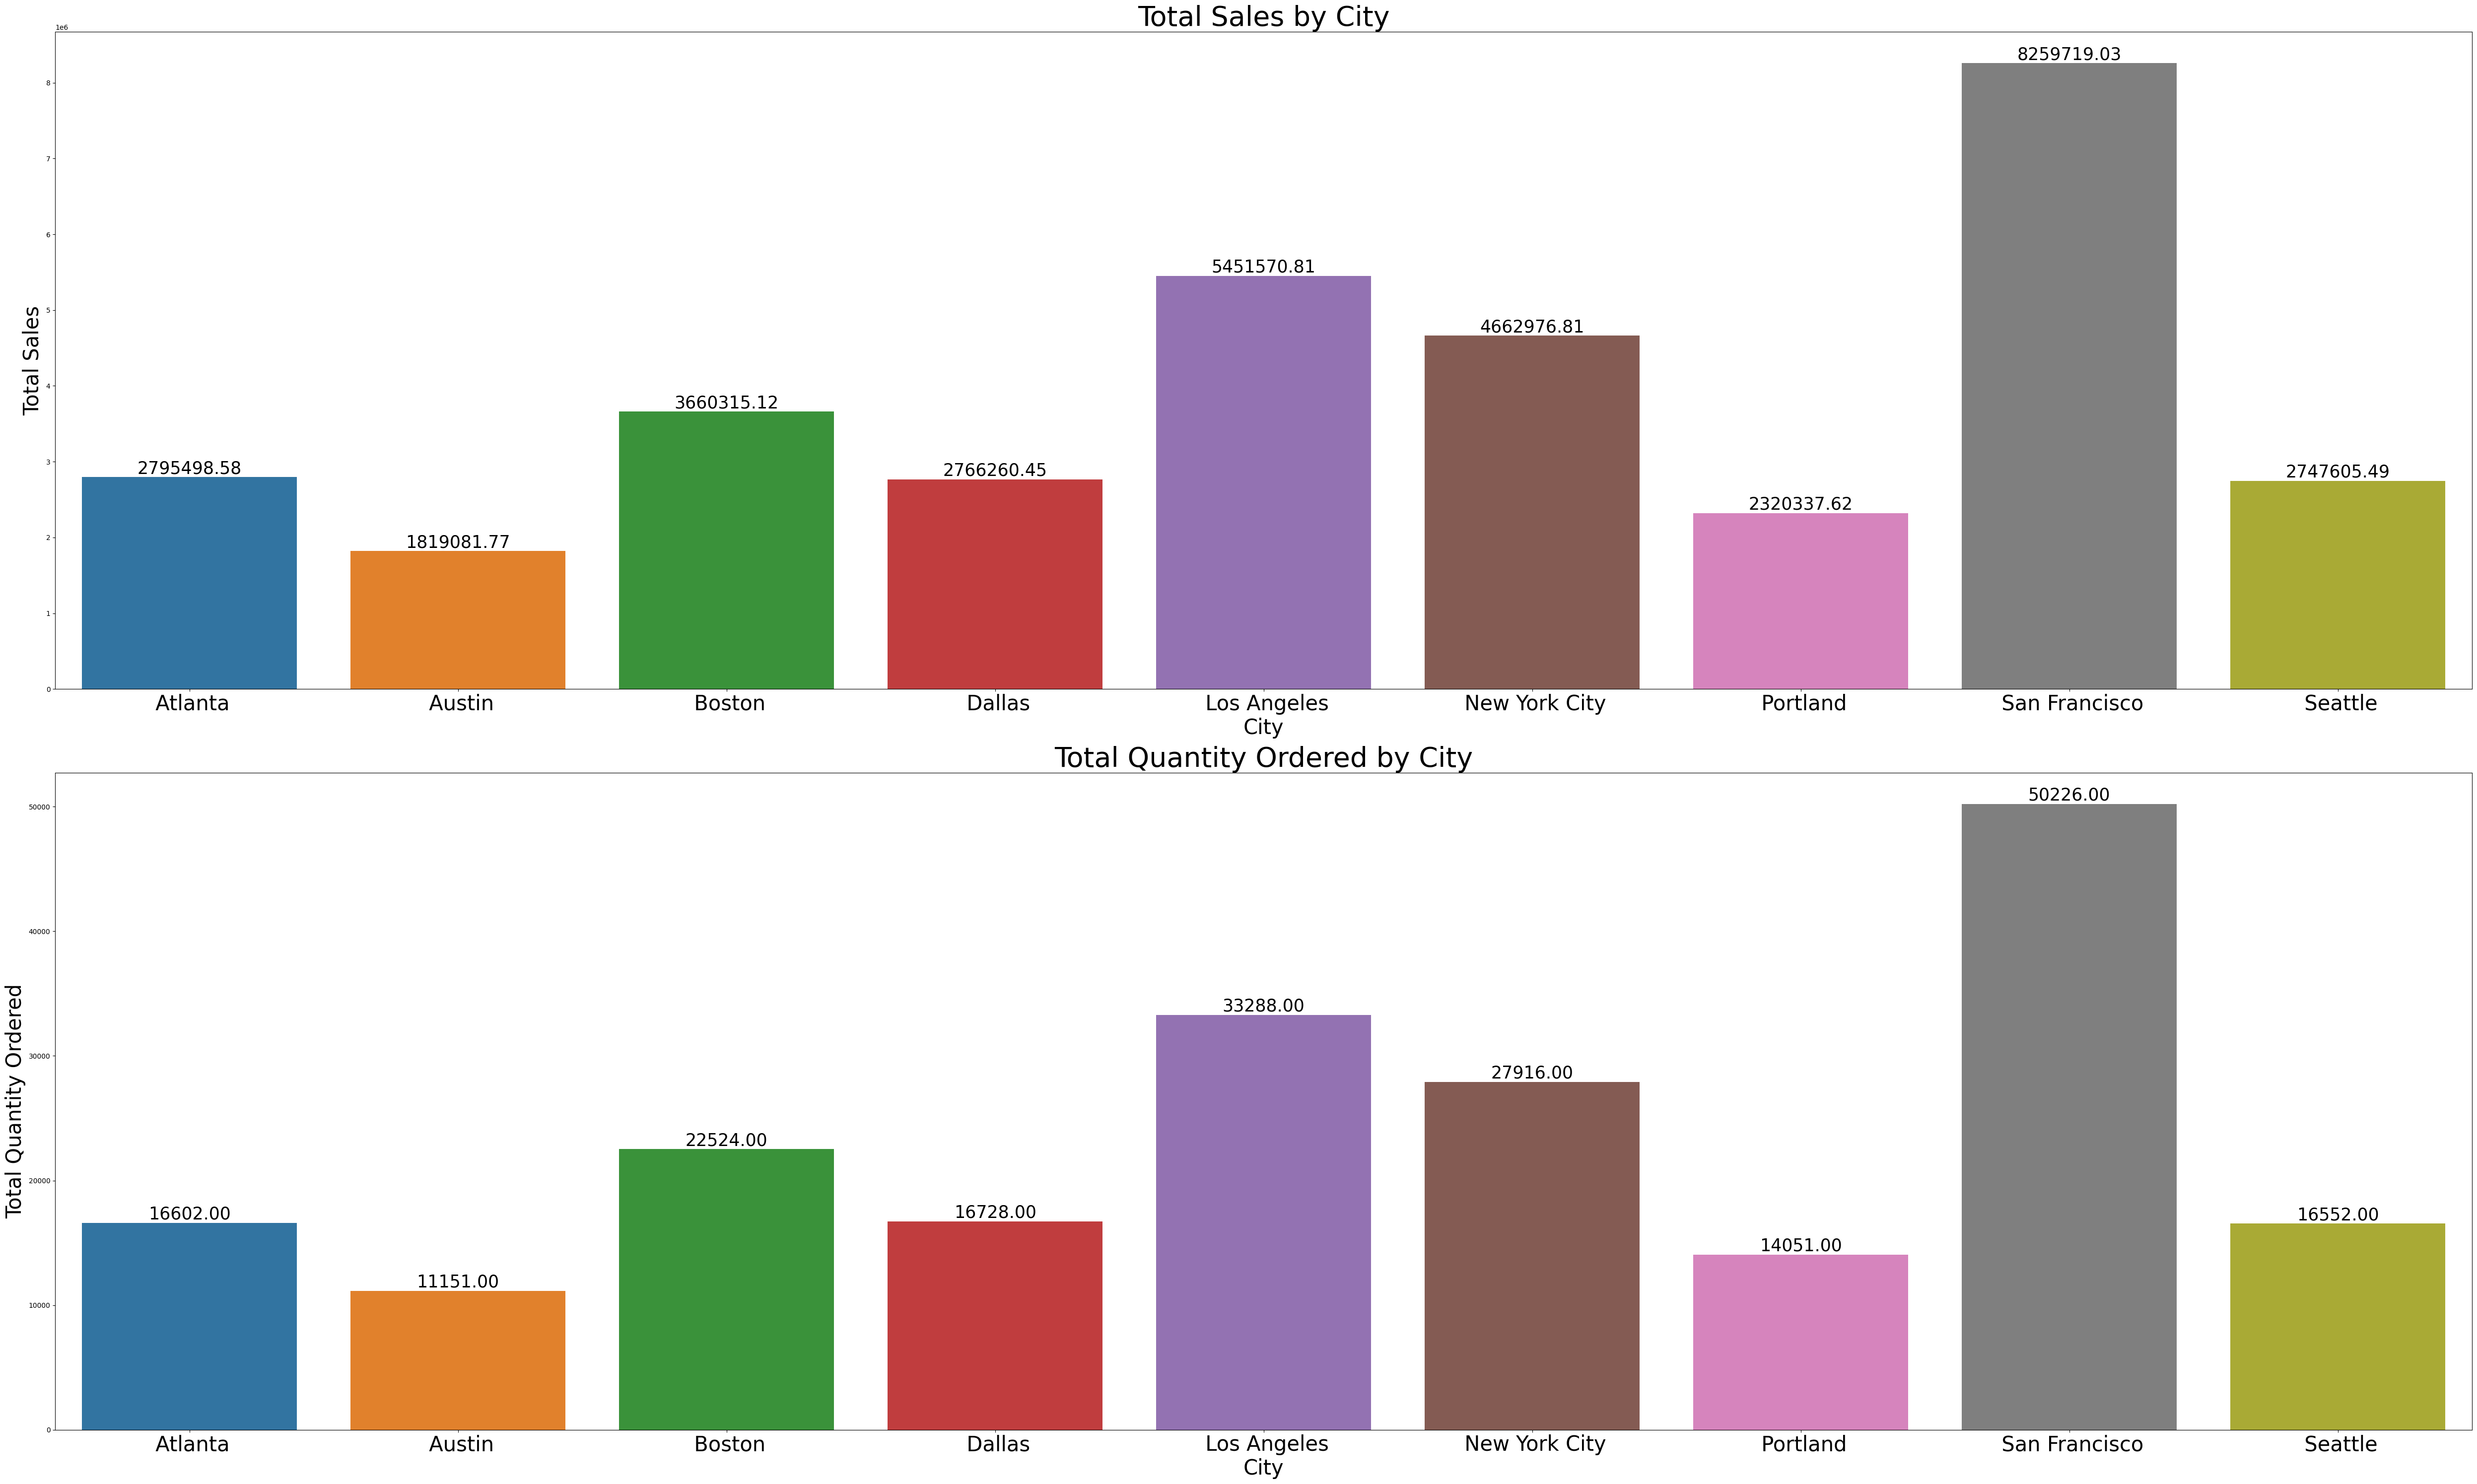

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'City', 'Sale', and 'Quantity Ordered'

# Group the data by 'City' and calculate the sum of 'Sale' and 'Quantity Ordered'
temp_data = df.groupby(['City'])[['Sale', 'Quantity Ordered']].sum().reset_index()

# Create a subplot with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(50, 30))

# Plot the Total Sales per City
sns.barplot(x='City', y='Sale', data=temp_data, ax=axes[0])
axes[0].set_xlabel('City', size=30)
axes[0].set_ylabel('Total Sales', size=30)
axes[0].set_xticklabels(axes[0].get_xticklabels(), size=30)
axes[0].bar_label(axes[0].containers[0], fmt='%.2f', size=25)
axes[0].set_title('Total Sales by City', size=40)

# Plot the Total Quantity Ordered per City
sns.barplot(x='City', y='Quantity Ordered', data=temp_data, ax=axes[1])
axes[1].set_xlabel('City', size=30)
axes[1].set_ylabel('Total Quantity Ordered', size=30)
axes[1].set_xticklabels(axes[1].get_xticklabels(), size=30)
axes[1].bar_label(axes[1].containers[0], fmt='%.2f', size=25)
axes[1].set_title('Total Quantity Ordered by City', size=40)

plt.tight_layout()
plt.show()


<b><span style ='color:red'>Note</b><sapn/>
    
here we will create a choropleth map in Folium to visualize sales data by city in the United States that show us the trends in the cities 
   

In [23]:
# Assuming you have a DataFrame 'df' with columns 'City' and 'Sale'

# Group the data by 'City' and calculate the sum of 'Sale'
temp_data = df.groupby(['City'])['Sales'].sum().reset_index()

# Create a Folium map centered on the United States
us_map = folium.Map(location=[40, -95], zoom_start=4)

# URL to the GeoJSON file for US states
url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"

# Create a choropleth map
folium.Choropleth(
    geo_data=url,
    name="choropleth",
    data=temp_data,
    columns=["City", "Sales"],  # Adjust column names here
    key_on="feature.properties.name",  # Use the correct key for matching state names
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name="Sales ($)",
).add_to(us_map)

# Add layer control to toggle the choropleth map
folium.LayerControl().add_to(us_map)

# Display the map
us_map


<b>1-Sales Trends Over Time<b/>:
    
Analyze sales trends over time, typically by grouping data by a time period (e.g., monthly

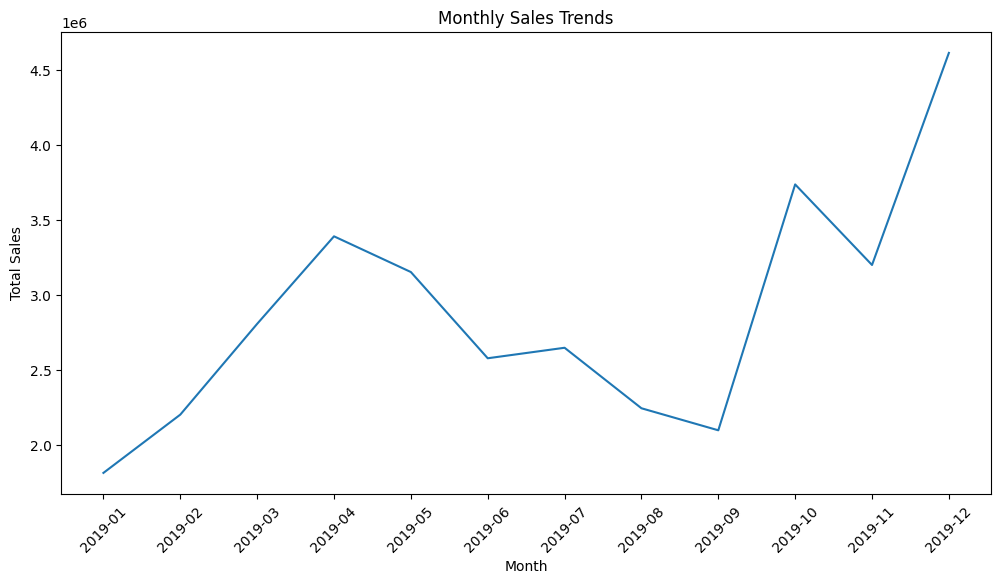

In [24]:
# Convert the date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group data by month and calculate total sales
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Convert PeriodIndex to strings for plotting
monthly_sales.index = monthly_sales.index.strftime('%Y-%m')

# Plot the sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.show()


<b>Best-Selling Products:<b/>
    
Identify the best-selling products based on total sales

In [25]:
# Group data by product and calculate total sales per product
product_sales = df.groupby('Product')['Sales'].sum()

# Sort products by total sales in descending order
best_selling_products = product_sales.sort_values(ascending=False)

# Display the top N best-selling products
N = 10
print("Top {} Best-Selling Products:".format(N))
print(best_selling_products.head(N))


Top 10 Best-Selling Products:
Product
Macbook Pro Laptop            8035900.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3318600.00
27in 4K Gaming Monitor        2434707.57
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2348550.00
Flatscreen TV                 1445400.00
Bose SoundSport Headphones    1345265.46
27in FHD Monitor              1131974.53
Name: Sales, dtype: float64


<b>Revenue Metrics:<b/>
    
Calculate revenue metrics like total sales, profit margins, and others depending on your dataset.


In [26]:
# Calculate total sales
total_sales = df['Sales'].sum()

# Calculate profit margin (assuming you have a 'Cost' column)
df['Profit'] = df['Sales'] - df['Price Each']
profit_margin = (df['Profit'].sum() / total_sales) * 100

print("Total Sales: ${:.2f}".format(total_sales))
print("Profit Margin: {:.2f}%".format(profit_margin))


Total Sales: $34483365.68
Profit Margin: 0.59%


<b>Data Visualization:<b/>
    
Create visualizations to present your findings effectively. This example creates a bar chart for the top-selling products.

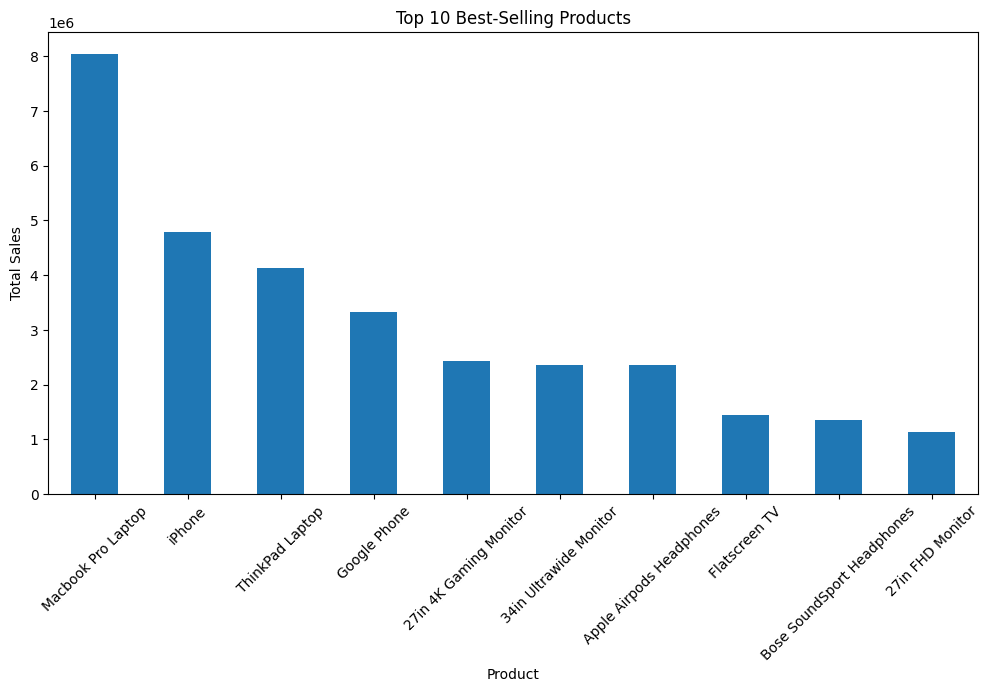

In [27]:
# Create a bar chart for the top N best-selling products
plt.figure(figsize=(12, 6))
top_products = best_selling_products.head(N)
top_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top {} Best-Selling Products'.format(N))
plt.xticks(rotation=45)
plt.show()
